In [106]:
import time
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport


data = pd.read_csv('drive/MyDrive/Colab Notebooks/BankChurners_ML.csv')
data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1.0,0.404255,1.0,0.6,0.6,0.5,0.50,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.729110,0.035273,0.248062,0.875067,0.061061,0.000086,0.999920
1,1.0,0.382979,1.0,0.4,0.4,0.5,0.25,0.0,0.534884,0.4,0.166667,0.333333,0.077747,0.495431,0.079970,0.751502,0.032158,0.108527,0.455574,0.311311,0.000047,0.999950
2,1.0,0.468085,1.0,0.4,0.4,1.0,0.75,0.0,0.534884,1.0,0.500000,0.500000,0.308900,0.666269,0.289051,0.832332,0.051797,0.170543,0.474960,0.144144,0.000295,0.999710
3,1.0,0.340426,1.0,1.0,1.0,0.5,0.00,0.0,0.418605,0.8,0.500000,0.333333,0.160522,0.582837,0.152928,0.453850,0.038444,0.248062,0.366182,0.217217,0.000183,0.999820
4,1.0,0.829787,1.0,0.2,0.4,0.5,0.25,0.0,0.953488,1.0,0.333333,0.500000,0.231476,0.630513,0.217454,0.782632,0.044731,0.124031,0.734518,0.174174,0.000190,0.999810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057,1.0,0.510638,1.0,0.4,0.4,1.0,0.25,0.0,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,0.383943,0.832647,0.829457,0.461497,0.462462,0.000184,0.999820
10058,0.0,0.319149,1.0,0.4,0.4,0.0,0.25,0.0,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,0.439104,0.459219,0.457364,0.367798,0.511512,0.995688,0.004311
10059,0.0,0.382979,0.0,0.2,0.6,0.5,1.00,0.0,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,0.447297,0.544175,0.387597,0.440495,0.000000,0.998299,0.001699
10060,0.0,0.085106,1.0,0.4,0.4,0.5,0.25,0.0,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,0.292190,0.438689,0.403101,0.388799,0.000000,0.997129,0.002875


# Using technologies from the previous step, relearn your ML models

In [107]:
def visual_model_selection(x, y, rfc):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
    visualizer = ClassificationReport(rfc)
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)

    start = time.time()
    rfc.fit(x_train, y_train)
    learn_time = time.time() - start
    y_pred = rfc.predict(x_test)

    print(f'accuracy_score  {metrics.accuracy_score(y_test, y_pred)}\nf1_score        {metrics.f1_score(y_test, y_pred)}\
            \nprecision_score {metrics.precision_score(y_test, y_pred)}\nrecall_score    {metrics.recall_score(y_test, y_pred)}\
            \nLearning time   {learn_time}\n')
    visualizer.poof()


x = data[data.columns[1:20]]
y = data[data.columns[0]]

ind = pd.Index([str(i) for i in (2, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19)])
x_best = data[ind]

random_forest = RandomForestClassifier(n_estimators=500)

# Estimate its efficiency and compare to former results

Before model upgrading
accuracy_score  0.9619079165286518
f1_score        0.9774818876052478            
precision_score 0.9663182346109176
recall_score    0.9889064976228209            
Learning time   6.199695110321045



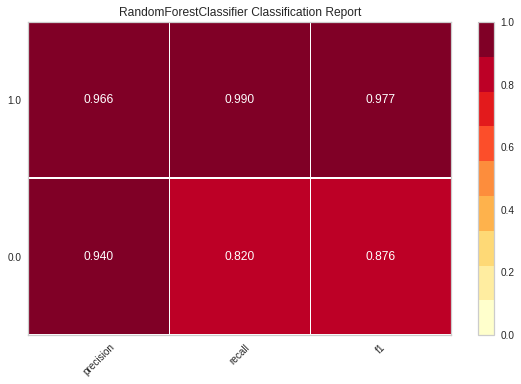



After model upgrading
accuracy_score  0.96588274263001
f1_score        0.9797523098093178            
precision_score 0.9722980881779165
recall_score    0.9873217115689382            
Learning time   5.7960205078125



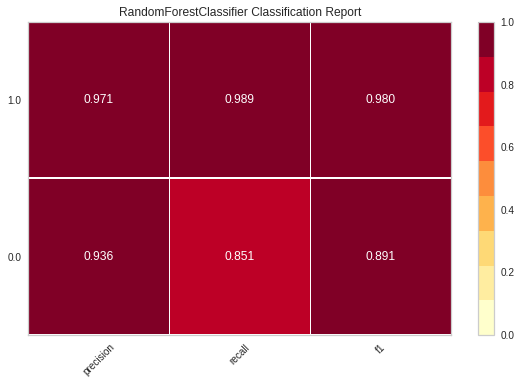

In [108]:
print('Before model upgrading')
visual_model_selection(x, y, random_forest)

print('\n\nAfter model upgrading')
visual_model_selection(x_best, y, random_forest)

# Provide conclusion

~~Стало лучше~~ В результате переобучения модели с лучшими параметрами и на основе самых эффективных фич улучшилась её точность и уменьшилось время обучения